### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

### Desafio 1:

A primeira etapa em um projeto de machine learning é a obtenção de dados. A partir dessa obtenção, podemos fazer a leitura dos dados para se construir um modelo. Como tarefa inicial, faça a leitura da base de dados e verifique a presença de dados nulos.

# <font color='orange'> Biblioteca </font>

In [5]:
#Importando Bibliotecas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# <font color='orange'> Importar Dados </font>

In [6]:
dados = pd.read_csv('church.csv')
dados.head()

id_cliente  score_credito     pais sexo_biologico  idade  anos_de_cliente  \
0    15634602            619   França         Mulher     42                2   
1    15647311            608  Espanha         Mulher     41                1   
2    15619304            502   França         Mulher     42                8   
3    15701354            699   França         Mulher     39                1   
4    15737888            850  Espanha         Mulher     43                2   

       saldo  servicos_adquiridos  tem_cartao_credito  membro_ativo  \
0       0.00                    1                   1             1   
1   83807.86                    1                   0             1   
2  159660.80                    3                   1             0   
3       0.00                    2                   0             0   
4  125510.82                    1                   1             1   

   salario_estimado  churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

# <font color='orange'> Explorando o Dataset </font>



In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10000 non-null  int64  
 1   score_credito        10000 non-null  int64  
 2   pais                 10000 non-null  object 
 3   sexo_biologico       10000 non-null  object 
 4   idade                10000 non-null  int64  
 5   anos_de_cliente      10000 non-null  int64  
 6   saldo                10000 non-null  float64
 7   servicos_adquiridos  10000 non-null  int64  
 8   tem_cartao_credito   10000 non-null  int64  
 9   membro_ativo         10000 non-null  int64  
 10  salario_estimado     10000 non-null  float64
 11  churn                10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [10]:
# informações gerais do dataframe, como média das variáveis, valor mínimo e máximo, ...
dados.describe()

id_cliente  score_credito         idade  anos_de_cliente  \
count  1.000000e+04   10000.000000  10000.000000     10000.000000   
mean   1.569094e+07     650.528800     38.921800         5.012800   
std    7.193619e+04      96.653299     10.487806         2.892174   
min    1.556570e+07     350.000000     18.000000         0.000000   
25%    1.562853e+07     584.000000     32.000000         3.000000   
50%    1.569074e+07     652.000000     37.000000         5.000000   
75%    1.575323e+07     718.000000     44.000000         7.000000   
max    1.581569e+07     850.000000     92.000000        10.000000   

               saldo  servicos_adquiridos  tem_cartao_credito  membro_ativo  \
count   10000.000000         10000.000000         10000.00000  10000.000000   
mean    76485.889288             1.530200             0.70550      0.515100   
std     62397.405202             0.581654             0.45584      0.499797   
min         0.000000             1.000000             0.00000      0.000000   
25%         0.000000             1.000000             0.00000      0.000000   
50%     97198.540000             1.000000             1.00000      1.000000   
75%    127644.240000             2.000000             1.00000      1.000000   
max    250898.090000             4.000000             1.00000      1.000000   

       salario_estimado         churn  
count      10000.000000  10000.000000  
mean      100090.239881      0.203700  
std        57510.492818      0.402769  
min           11.580000      0.000000  
25%        51002.110000      0.000000  
50%       100193.915000      0.000000  
75%       149388.247500      0.000000  
max       199992.480000      1.000000

In [11]:
# sem valores nulos
dados.isnull().sum()

id_cliente             0
score_credito          0
pais                   0
sexo_biologico         0
idade                  0
anos_de_cliente        0
saldo                  0
servicos_adquiridos    0
tem_cartao_credito     0
membro_ativo           0
salario_estimado       0
churn                  0
dtype: int64

### Desafio 2

Após a leitura dos dados, é importante conhecer os dados, checando inconsistências e entendendo o comportamento de cada uma das colunas. Nesta tarefa, faça uma análise exploratória utilizando gráficos para as **variáveis categóricas** da base de dados, incluindo a **variável alvo** churn. Para essas variáveis, pode ser utilizado gráficos de barras para fazer a contagem das categorias e fazer um agrupamento por cores de acordo com as categorias da variável alvo.

# <font color='orange'> Variáveis categóricas </font>


In [12]:
import plotly.express as px

In [13]:
px.histogram(dados, x = 'pais', text_auto = True)

In [14]:
px.histogram(dados, x = 'sexo_biologico', text_auto = True)

# <font color='orange'> Variáveis alvos </font>

In [25]:
x = dados.drop('churn', axis = 1)
y = dados['churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

### Desafio 3

Depois de explorar as variáveis categóricas, chegou a vez das **variáveis numéricas**. Construa gráficos de distribuição como boxplots ou histogramas para analisar o comportamento dos valores numéricos e checar se existem valores inconsistentes.

# <font color='orange'> Variáveis numéricas </font>



In [15]:
px.box(dados, x = 'id_cliente', color = 'churn')

In [16]:
px.box(dados, x = 'score_credito', color = 'churn')

In [17]:
px.box(dados, x = 'idade', color = 'churn')

In [18]:
px.box(dados, x = 'anos_de_cliente', color = 'churn')

In [19]:
px.box(dados, x = 'saldo', color = 'churn')

In [20]:
px.box(dados, x = 'servicos_adquiridos', color = 'churn')

In [21]:
px.box(dados, x = 'tem_cartao_credito', color = 'churn')

In [22]:
px.box(dados, x = 'membro_ativo', color = 'churn')

In [23]:
px.box(dados, x = 'salario_estimado', color = 'churn')

In [24]:
px.box(dados, x = 'salario_estimado', color = 'churn')

### Desafio 4:

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais são as variáveis explicativas e qual é a variável alvo. Neste desafio, faça a separação da base de dados de churn entre as variáveis explicativas, armazenando em uma variável x e a variável alvo em y.


# <font color='orange'> Transformando as variáveis explicativas </font>


Os algoritmos de machine learning não compreendem dados no formato de texto, portanto devemos fazer transformações nos dados para o formato numérico para que o algoritmo consiga compreender as informações. Essa transformação precisa ser feita de forma que não altere a informação original do conjunto de dados, portanto não basta simplesmente alterar os valores para valores numéricos aleatórios.

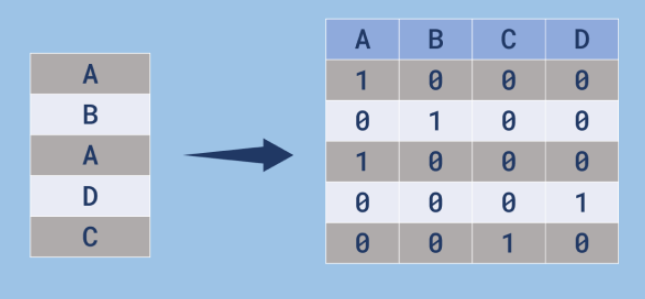

In [40]:
# Transformando as variáveis categóricas em numéricas usando LabelEncoder
label_encoder = LabelEncoder()
dados['tem_cartao_credito'] = label_encoder.fit_transform(dados['tem_cartao_credito'])
dados['membro_ativo'] = label_encoder.fit_transform(dados['membro_ativo'])
dados['churn'] = label_encoder.fit_transform(dados['churn'])

# Imprimindo os dados transformados
print(dados['tem_cartao_credito'])
print(dados['membro_ativo'])
print(dados['churn'])


0       1
1       0
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: tem_cartao_credito, Length: 10000, dtype: int64
0       1
1       1
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    1
9998    0
9999    0
Name: membro_ativo, Length: 10000, dtype: int64
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64


# <font color='orange'> Transformando as variáveis alvo </font>

In [33]:
x = dados.drop('churn', axis = 1)
y = dados['churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

### Desafio 5:

Variáveis categóricas que estejam em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Neste desafio, faça a transformação das variáveis categóricas para formato numérico usando o [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), utilizando o parâmetro `drop='if_binary'` caso alguma variável tenha apenas 2 categorias.

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [41]:
#Transforma apenas as freatures
one_hot = OneHotEncoder(drop = 'if_binary') # crio objeto que ira converter para 0 a 1
transformer = make_column_transformer((one_hot, ['tem_cartao_credito', 'membro_ativo']), remainder='passthrough', sparse_threshold=0) # cria modelo para transformar as colunas

In [42]:
transformer.fit_transform(x) #array

array([[1.0, 1.0, 15634602, ..., 0.0, 1, 101348.88],
       [0.0, 1.0, 15647311, ..., 83807.86, 1, 112542.58],
       [1.0, 0.0, 15619304, ..., 159660.8, 3, 113931.57],
       ...,
       [0.0, 1.0, 15584532, ..., 0.0, 1, 42085.58],
       [1.0, 0.0, 15682355, ..., 75075.31, 2, 92888.52],
       [1.0, 0.0, 15628319, ..., 130142.79, 1, 38190.78]], dtype=object)

In [43]:
# Colunas de entrada
transformer.feature_names_in_

array(['id_cliente', 'score_credito', 'pais', 'sexo_biologico', 'idade',
       'anos_de_cliente', 'saldo', 'servicos_adquiridos',
       'tem_cartao_credito', 'membro_ativo', 'salario_estimado'],
      dtype=object)

In [44]:
# Colunas de saída
transformer.get_feature_names_out()

array(['onehotencoder__tem_cartao_credito_1',
       'onehotencoder__membro_ativo_1', 'remainder__id_cliente',
       'remainder__score_credito', 'remainder__pais',
       'remainder__sexo_biologico', 'remainder__idade',
       'remainder__anos_de_cliente', 'remainder__saldo',
       'remainder__servicos_adquiridos', 'remainder__salario_estimado'],
      dtype=object)

In [45]:
linhas = transformer.fit_transform(x)
colunas = transformer.get_feature_names_out()
x_onehot = pd.DataFrame(linhas, columns = colunas) #freatures x modificados

### Desafio 6:

A variável alvo, como é do tipo categórica, também precisa passar por um tratamento similar às variáveis explicativas categóricas para que possa ser usada nos algoritmos. Nessa tarefa, utilize o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transformação da variável churn.

In [49]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [50]:
#Transforma apenas as freatures
one_hot = OneHotEncoder(drop = 'if_binary') # crio objeto que ira converter para 0 a 1
transformer = make_column_transformer((one_hot, ['churn']), remainder='passthrough', sparse_threshold=0) # cria modelo para transformar as colunas

In [52]:
#transformer.fit_transform(x) #array

In [53]:
# Colunas de entrada
transformer.feature_names_in_

array(['id_cliente', 'score_credito', 'pais', 'sexo_biologico', 'idade',
       'anos_de_cliente', 'saldo', 'servicos_adquiridos',
       'tem_cartao_credito', 'membro_ativo', 'salario_estimado'],
      dtype=object)

In [55]:
# Colunas de saída
#transformer.get_feature_names_out()

In [58]:
#linhas = transformer.fit_transform(x)
#colunas = transformer.get_feature_names_out()
x_onehot = pd.DataFrame(linhas, columns = colunas) #freatures x modificados

### Desafio 7:

A separação dos dados entre conjunto de treinamento e teste é essencial para compreender se um modelo está conseguindo aprender os padrões e generalizar para novos dados. Nesta tarefa, faça a divisão da base de dados entre treinamento e teste de forma estratificada.

In [65]:
# Dividindo os dados em treinamento e teste de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(x_onehot, y, test_size=0.2, stratify=y, random_state=42)


### Desafio 8:

Um modelo de base é muito importante para definir um critério de comparação para modelos mais complexos. Nesta etapa, crie um modelo de base com o `DummyClassifier` e encontre a taxa de acerto com o método `score`.

In [68]:
from sklearn.dummy import DummyClassifier

# Criando um modelo de base com DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)

# Calculando a taxa de acerto no conjunto de teste
accuracy = dummy_model.score(X_test, y_test)
print("Taxa de acerto do modelo de base (DummyClassifier):", accuracy)


Taxa de acerto do modelo de base (DummyClassifier): 0.7965


### Desafio 9:

A árvore de decisão é um algoritmo que faz as classificações a partir de decisões simples tomadas a partir dos dados. Temos que tomar certo cuidado para não utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Neste desafio, crie um modelo de árvore de decisão com o parâmetro `max_depth=4`, avalie o desempenho do modelo nos dados de teste e visualize as decisões da árvore usando o método `plot_tree`.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Criando um modelo de árvore de decisão com profundidade máxima de 4
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Avaliando o desempenho do modelo nos dados de teste
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia da Árvore de Decisão:", accuracy)

# Visualizando as decisões da árvore
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=['Não Churn', 'Churn'])
plt.show()


### Desafio 10:

A normalização de dados é uma tarefa importante para manter todos os valores numéricos em uma mesma escala e garantir que todas as características tenham o mesmo impacto no modelo. Nesta tarefa, faça a normalização da base de dados usando o [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Criando um objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizando os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Normalizando os dados de teste (usando a mesma escala dos dados de treinamento)
X_test_scaled = scaler.transform(X_test)


### Desafio 11:

Com os dados normalizados, podemos utilizar o modelo KNN, que faz cálculos de distância para encontrar os vizinhos mais próximos. Nesta atividade, crie um modelo KNN usando o [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) com os dados normalizados e avalie o desempenho nos dados de teste, também normalizados.

In [ ]:
# Criando um modelo KNN com k=5 (número de vizinhos)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Treinando o modelo com os dados de treinamento normalizados
knn_model.fit(X_train_scaled, y_train)

# Fazendo previsões nos dados de teste normalizados
y_pred = knn_model.predict(X_test_scaled)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do KNN:", accuracy)


### Desafio 12:

Após a construção dos modelos, é o momento de comparar os resultados e selecionar aquele que tem o melhor desempenho. Neste desafio, avalie a taxa de acerto dos modelos `DummyClassifier`, `DecisionTreeClassifier` e `KNeighborsClassifier` que foram construídos nos outros desafios utilizando o método `score` e depois armazene o modelo com melhor acurácia em um arquivo `pickle`. Os modelos de transformação também precisam ser armazenados, que é o caso do `OneHotEncoder` e do `MinMaxScaler`, caso o KNN tenha o melhor desempenho.

In [ ]:
# prompt: faça um códico que avalie a taxa de acerto dos modelos DummyClassifier, DecisionTreeClassifier e KNeighborsClassifier que foram construídos nos outros desafios utilizando o método score e depois armazene o modelo com melhor acurácia em um arquivo pickle. Os modelos de transformação também precisam ser armazenados, que é o caso do OneHotEncoder e do MinMaxScaler

# Avaliando a taxa de acerto dos modelos
dummy_accuracy = dummy_model.score(X_test, y_test)
tree_accuracy = tree_model.score(X_test, y_test)
knn_accuracy = knn_model.score(X_test_scaled, y_test)

print("Taxa de acerto do DummyClassifier:", dummy_accuracy)
print("Taxa de acerto do DecisionTreeClassifier:", tree_accuracy)
print("Taxa de acerto do KNeighborsClassifier:", knn_accuracy)

# Encontrando o modelo com a melhor acurácia
best_model = None
best_accuracy = 0

if dummy_accuracy > best_accuracy:
  best_model = dummy_model
  best_accuracy = dummy_accuracy

if tree_accuracy > best_accuracy:
  best_model = tree_model
  best_accuracy = tree_accuracy

if knn_accuracy > best_accuracy:
  best_model = knn_model
  best_accuracy = knn_accuracy

print("O melhor modelo é:", best_model.__class__.__name__)
print("Com acurácia de:", best_accuracy)

# Salvando o melhor modelo e os transformadores em arquivos pickle
import pickle

if best_model == knn_model:
  with open('melhor_modelo.pkl', 'wb') as file:
    pickle.dump(best_model, file)

  with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(one_hot, file)

  with open('minmax_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
else:
  with open('melhor_modelo.pkl', 'wb') as file:
    pickle.dump(best_model, file)


### Desafio 13:

Depois que o modelo está em produção, já pode ser utilizado para classificar novos dados. Neste desafio, faça a leitura dos arquivos `pickle` dos modelos que foram salvos no desafio anterior e utilize os modelos para fazer a previsão do seguinte registro:

```
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['sim'],
    'membro_ativo': ['sim'],
    'salario_estimado': [85270.00]
})
```


In [ ]:
import matplotlib.pyplot as plt
import pickle

# Salvando o modelo KNN em um arquivo pickle
with open('modelo_knn.pkl', 'wb') as arquivo:
  pickle.dump(modelo_knn, arquivo)

# Carregando o modelo KNN do arquivo pickle
with open('modelo_knn.pkl', 'rb') as arquivo:
  modelo_knn_carregado = pickle.load(arquivo)

# Fazendo previsões com o modelo carregado
previsoes_carregadas = modelo_knn_carregado.predict(x_teste_scaled)

# Avaliando a acurácia do modelo carregado
acuracia_carregada = accuracy_score(y_teste, previsoes_carregadas)
print('Acurácia do modelo KNN carregado:', acuracia_carregada)

# Gráficos
modelos = ['Dummy', 'SVC', 'KNN', 'Naive Bayes', 'Bernoulli NB', 'KNN Carregado']
acuracias = [acuracia_dummy, acuracia_svc, acuracia_knn, acuracia_nb, acuracia_bnb, acuracia_carregada]

plt.bar(modelos, acuracias)
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()